# Simple image Classification (Binary-class) with Dogs vs Cat dataset


### Author : Olufemi Victor Tolulope

###### Team: Project team Pluto: Basics to Computer Vision with Tensorflow.

#### Week 3

The third week has really got our hands full thus far, trying out various neural networks for image classification, This tutorial uses the Keras API, with tensorflow as backend.

Let's dive in, First I import the needed packages.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In the next step, i pull in the dataset from the url which I specified in the readme.

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

The os package reads the file structure, and gets the directory organized such that we can set appropriate file paths for training and validation set.

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Lets's check out the number of cat and Dog images in the training and validation directory.

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Let's set our variables for ease which would be used during training and preprocessing.

In [7]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

First, I set the image_data_generator class provided by keras API to scale the tensors by dividing by 255 as well as convert images to tensors.

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

After defining the training and validation image generator, I use the flow from directory method to load in the images which automatically applies the preset preprocessing.

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


Here, i do a simple extract and visualize. The visualization is easily done with a function i defined using matplotlib.

The next function as used here simply returns a batch of the dataset.

In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

See images

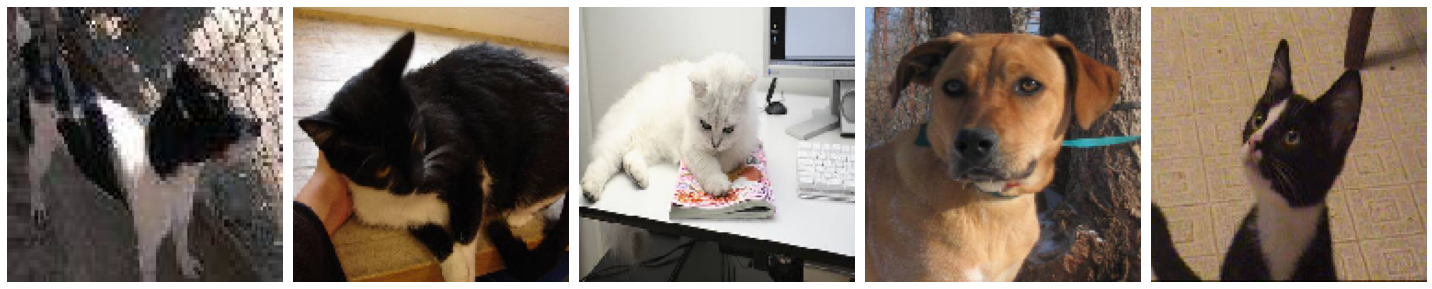

In [13]:
plotImages(sample_training_images[:5])

###### Model Building

Here, I simply build a simple model which consist of three Convolution blocks with their max pooling layer, in addition, I put  512 units of fully connected layers with activation function as "relu". The model output is of a binary form so i just throw in SIGMOID as the activation function. Read more on Elisha's blog as specified in the readme.

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In this part, I compile the model using the adam optimizer, and setting "Binary Cross Entropy" as the loss function. I also passed in accuracy to display during training per epoch.

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

###### A clear view of the model.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

Perform Training.................

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 49s 3s/step - loss: 0.7428 - accuracy: 0.4973 - val_loss: 0.6903 - val_accuracy: 0.5804
Epoch 2/15
15/15 [==============================] - 50s 3s/step - loss: 0.6854 - accuracy: 0.5604 - val_loss: 0.6703 - val_accuracy: 0.6518
Epoch 3/15
15/15 [==============================] - 48s 3s/step - loss: 0.6556 - accuracy: 0.6170 - val_loss: 0.6246 - val_accuracy: 0.6518
Epoch 4/15
15/15 [==============================] - 49s 3s/step - loss: 0.6030 - accuracy: 0.6688 - val_loss: 0.6272 - val_accuracy: 0.6551
Epoch 5/15
15/15 [==============================] - 48s 3s/step - loss: 0.5513 - accuracy: 0.7276 - val_loss: 0.5433 - val_accuracy: 0.7299
Epoch 6/15
15/15 [==============================] - 48s 3s/step - loss: 0.4997 - accuracy: 0.7564 - val_loss: 0.5367 - val_accuracy: 0.7355
Epoch 7/15
15/15 [==============================] - 48s 3s/step - loss: 0.4298 - acc

Now that trainig the network is done, let's visualize the results.

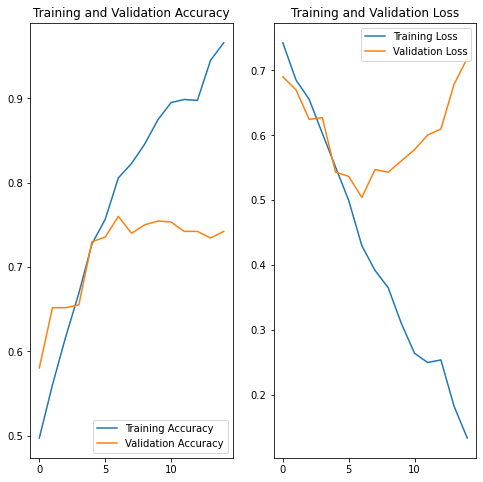

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the plot, we see the significant gap between training and validation accuracy, The model achieves a near perfect score while the model struggles around 75% in the validation set.

###### So the question arises, Can we improve?, can we get better?

for sure!, the answer is always yes!, Elisha's blog as referenced introduces methods to prevent model overfitting, as well as improve model generalization the two major solutions he proposed were:

1. Data augumentaion
2. Regularization Techniques.

Although, these techniques will be introduced fully in next week's tasks, you can try them out and see if model improves very significantly. Find more details in Elisha's blog, all references are in the readme file.

###### The End